In [13]:
import pandas as pd 
import sklearn.cluster as skl
import matplotlib.pyplot as plt

##### Cargando DataFrame

In [20]:
df= pd.read_csv('./procesadores.csv')
x = df['Precio']
y = df['Velocidad']

##### Calculando la Suma de los Errores Cuadráticos en cada Iteración

In [21]:
SSE = []
for k in range(1,10):
    kmeans = skl.KMeans(n_clusters=k).fit(df)
    SSE.append(kmeans.inertia_)

d:\zdesp\Documents\python\ipn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\zdesp\Documents\python\ipn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\zdesp\Documents\python\ipn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\zdesp\Documents\python\ipn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\zdesp\Documents\p

##### Elbow Plot

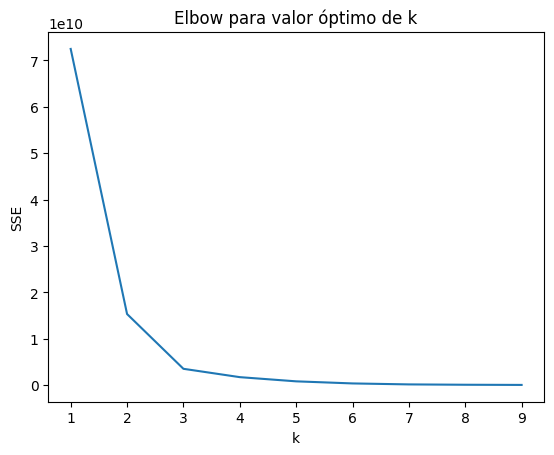

In [23]:
plt.plot(range(1,10), SSE)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow para valor óptimo de k')
plt.savefig('elbow.pdf')
plt.show()

##### Algortimo clustering para $k=3$ 

In [24]:
kmeans = skl.KMeans(n_clusters = 3).fit(df)

#Obteniendo los centroides 
centroids =kmeans.cluster_centers_

#Obteniendo lista con las etiquetas de los datos
labels = kmeans.predict(df)

#Agregar a DataFrame columna para las etiquetas de clasificación 
df['Etiquetas'] = labels

#Tabla de Colores
colors = ['red','orange','green','pink','blue']

colors_data = []
colors_centroids = []

for row in labels:
    colors_data.append(colors[row])

for i in range(len(centroids)):
    colors_centroids.append(colors[i])


d:\zdesp\Documents\python\ipn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Gráfica de Disperción

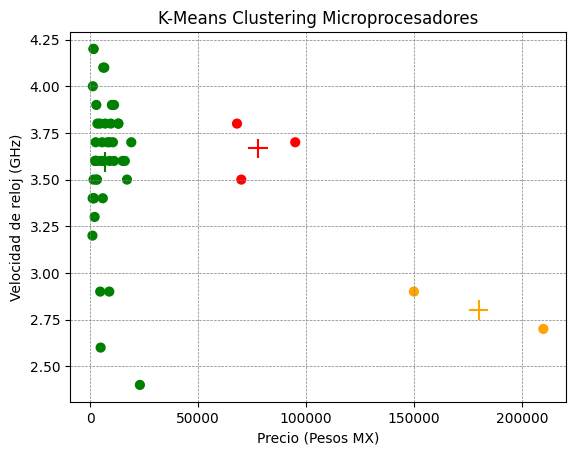

In [29]:
plt.scatter(x, y, c=colors_data, marker='o', s=40)
plt.scatter(centroids[:,0], centroids[:,1], c=colors_centroids, marker='+', s=200)
plt.xlabel('Precio (Pesos MX)')
plt.ylabel('Velocidad de reloj (GHz)')
plt.title('K-Means Clustering Microprocesadores')
plt.grid(color='gray', linestyle='--', linewidth = 0.5)
plt.savefig('kmenas.pdf')
plt.show()
